In [1]:
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

## Load the data

In [2]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

## Analyze the Data

In [3]:
print('Training data shape : ',train_X.shape,train_Y.shape)
print('Testing data shape : ',test_X.shape,test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [4]:
# find the unique numbers from the train labels 
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ',nClasses)
print('Output classes : ',classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


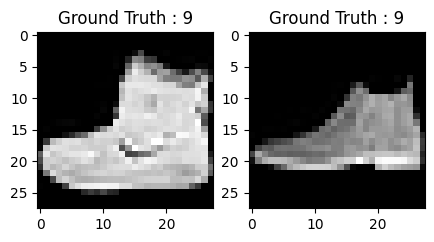

In [5]:
plt.figure(figsize=(5,5))
# Display the first image in training data 
plt.subplot(121)
plt.imshow(train_X[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_Y[0]))
# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(test_Y[0]))
plt.show()

## Data Preprocessing 

In [6]:
train_X = train_X.reshape(-1,28,28,1)
test_X = test_X.reshape(-1,28,28,1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
# change datatype from int8 to float32
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.0
test_X = test_X/255.0

In [8]:
# change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y) 
test_Y_one_hot = to_categorical(test_Y)
# display the change for category label using one-hot encoding
print('original label : ',train_Y[0])
print('After convrsion to one-hot : ',train_Y_one_hot[0])

original label :  9
After convrsion to one-hot :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [9]:
train_X,valid_X, train_label,valid_label = train_test_split(train_X,
                                                            train_Y_one_hot,
                                                            test_size=0.2,
                                                            random_state=42)

In [10]:
# check the shape of training and validation data
print(train_X.shape)
print(valid_X.shape)
print(train_label.shape)
print(valid_label.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)
(48000, 10)
(12000, 10)


## The Network

- You will use 3 concolutional layers :
- 1] First layer will have 32 - 3x3 filters 
- 2] Second layer will have 64 - 3x3 filters 
- 3] Third layer will have 128 - 3x3 layers
- 4] also there are 3 max-pooling layers each of size 2x2

## Model the Data 

In [11]:
from keras.layers.normalization import batch_normalization
from tensorflow.keras import Input, Model, Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU
import keras

In [12]:
batch_size = 64
epochs = 20
num_classes = 10

## Neural Network Architecture

In [13]:
fashion_model = Sequential()
# first convolution layer
fashion_model.add(Conv2D(32, kernel_size=(3,3),
                         activation='linear',
                         input_shape=(28,28,1),
                         padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
# first pooling layer
fashion_model.add(MaxPooling2D(pool_size=(2,2),
                               padding='same'))
# second convolution layer
fashion_model.add(Conv2D(64,kernel_size=(3,3),
                         activation='linear',
                         padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
# second pooling layer
fashion_model.add(MaxPooling2D(pool_size=(2,2),
                               padding='same'))

# third convolution layer
fashion_model.add(Conv2D(128,kernel_size=(3,3),
                         activation='linear',
                         padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
# third pooling layer
fashion_model.add(MaxPooling2D(pool_size=(2,2),
                               padding='same'))
fashion_model.add(Flatten())
# first dense layer
fashion_model.add(Dense(128,activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
# second dense layer
fashion_model.add(Dense(num_classes,activation='softmax'))

## Compile the Model

In [14]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy,
                     optimizer=keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [15]:
# visualize the layers using summary func
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

## Train the Model

In [16]:
fashion_train = fashion_model.fit(train_X,train_label,
                                  batch_size=batch_size,
                                  epochs=epochs,
                                  verbose=1,
                                  validation_data=(valid_X,valid_label))

Epoch 1/20
750/750 [==============================] - 44s 57ms/step - loss: 0.4726 - accuracy: 0.8286 - val_loss: 0.3595 - val_accuracy: 0.8748
Epoch 2/20
750/750 [==============================] - 52s 70ms/step - loss: 0.2884 - accuracy: 0.8943 - val_loss: 0.2748 - val_accuracy: 0.8979
Epoch 3/20
750/750 [==============================] - 59s 79ms/step - loss: 0.2394 - accuracy: 0.9116 - val_loss: 0.2644 - val_accuracy: 0.9061
Epoch 4/20
750/750 [==============================] - 58s 77ms/step - loss: 0.2058 - accuracy: 0.9238 - val_loss: 0.2404 - val_accuracy: 0.9110
Epoch 5/20
750/750 [==============================] - 57s 75ms/step - loss: 0.1810 - accuracy: 0.9331 - val_loss: 0.2267 - val_accuracy: 0.9187
Epoch 6/20
750/750 [==============================] - 57s 76ms/step - loss: 0.1604 - accuracy: 0.9409 - val_loss: 0.2373 - val_accuracy: 0.9155
Epoch 7/20
750/750 [==============================] - 57s 76ms/step - loss: 0.1430 - accuracy: 0.9471 - val_loss: 0.2313 - val_accuracy:

## Model Evaluation on the Test Set

In [18]:
test_eval = fashion_model.evaluate(test_X,test_Y_one_hot,
                                   verbose=0)

In [19]:
print('Test loss : ',test_eval[0]*100)
print('Test accuracy : ',test_eval[1]*100)

Test loss :  49.1792231798172
Test accuracy :  91.50000214576721


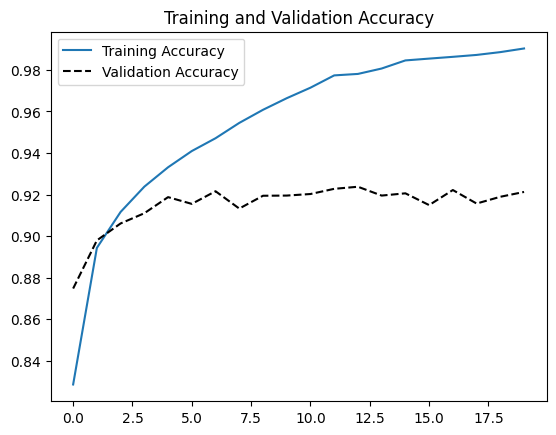

In [20]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,label='Training Accuracy')
plt.plot(epochs,val_accuracy,'k--',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

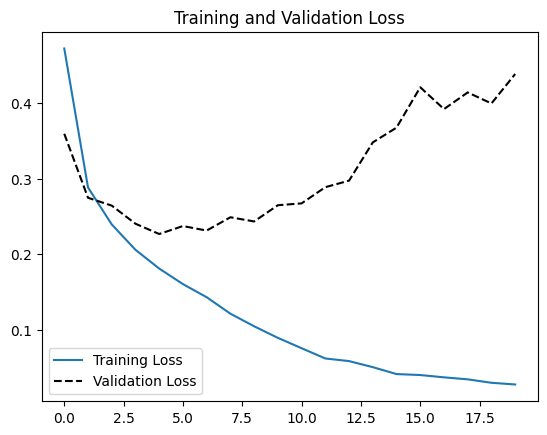

In [21]:
plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,'k--',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## Adding Dropout into the Network

In [22]:
batch_size = 64
epochs = 20
num_classes = 10

In [24]:
fashion_model = Sequential()
# first convolution layer
fashion_model.add(Conv2D(32,kernel_size=(3,3),
                         activation='linear',
                         padding='same',
                         input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
# first pooling layer
fashion_model.add(MaxPooling2D(pool_size=(2,2),
                               padding='same'))
# first dropout layer
fashion_model.add(Dropout(0.25))
# second convolution layer
fashion_model.add(Conv2D(64,kernel_size=(3,3),
                         activation='linear',
                         padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
# second pooling layer
fashion_model.add(MaxPooling2D(pool_size=(2,2),
                               padding='same'))
# second dropout layer
fashion_model.add(Dropout(0.25))
# third convolution layer
fashion_model.add(Conv2D(128,kernel_size=(3,3),
                         activation='linear',
                         padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
# third pooling layer
fashion_model.add(MaxPooling2D(pool_size=(2,2),
                               padding='same'))
# third dropout layer
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
# first Dense layer
fashion_model.add(Dense(128,activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
# fourth dropout layer
fashion_model.add(Dropout(0.3))
# second Dense layer
fashion_model.add(Dense(num_classes,activation='softmax'))

In [26]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy,
                      optimizer=keras.optimizers.Adam(),
                      metrics=['accuracy'])

In [27]:
# visualize the layers using summary function
fashion_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                      

In [29]:
fashion_train_dropout = fashion_model.fit(train_X,
                                          train_label,
                                          epochs=epochs,
                                          batch_size=batch_size,
                                          verbose=1,
                                          validation_data=(valid_X,valid_label))

Epoch 1/20
750/750 [==============================] - 59s 78ms/step - loss: 0.3823 - accuracy: 0.8603 - val_loss: 0.3048 - val_accuracy: 0.8874
Epoch 2/20
750/750 [==============================] - 59s 78ms/step - loss: 0.3314 - accuracy: 0.8771 - val_loss: 0.2826 - val_accuracy: 0.8962
Epoch 3/20
750/750 [==============================] - 59s 78ms/step - loss: 0.3026 - accuracy: 0.8890 - val_loss: 0.2567 - val_accuracy: 0.9031
Epoch 4/20
750/750 [==============================] - 58s 78ms/step - loss: 0.2820 - accuracy: 0.8946 - val_loss: 0.2394 - val_accuracy: 0.9133
Epoch 5/20
750/750 [==============================] - 58s 77ms/step - loss: 0.2662 - accuracy: 0.9007 - val_loss: 0.2391 - val_accuracy: 0.9111
Epoch 6/20
750/750 [==============================] - 60s 80ms/step - loss: 0.2571 - accuracy: 0.9040 - val_loss: 0.2314 - val_accuracy: 0.9140
Epoch 7/20
750/750 [==============================] - 65s 86ms/step - loss: 0.2477 - accuracy: 0.9072 - val_loss: 0.2204 - val_accuracy:

## Save Model 

In [30]:
fashion_model.save('fashion_model_dropout.h5py')

INFO:tensorflow:Assets written to: fashion_model_dropout.h5py\assets


INFO:tensorflow:Assets written to: fashion_model_dropout.h5py\assets


## Model Evaluation on the Test Set 

In [31]:
test_eval = fashion_model.evaluate(test_X,test_Y_one_hot,
                                   verbose=1)

313/313 [==============================] - 4s 14ms/step - loss: 0.2240 - accuracy: 0.9196


In [33]:
print('Test loss : ',test_eval[0]*100)
print('Test Accuracy : ',test_eval[1]*100)

Test loss :  22.401221096515656
Test Accuracy :  91.96000099182129


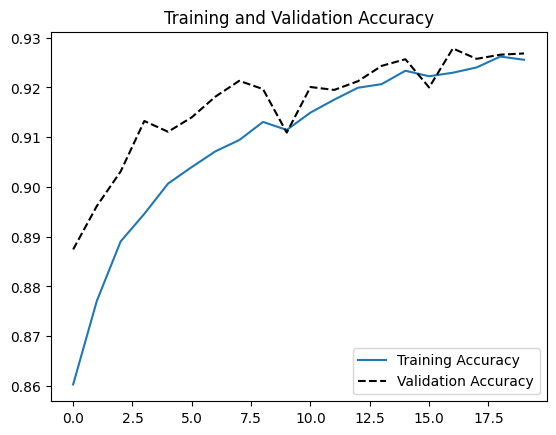

In [38]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,label='Training Accuracy')
plt.plot(epochs,val_accuracy,'k--',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

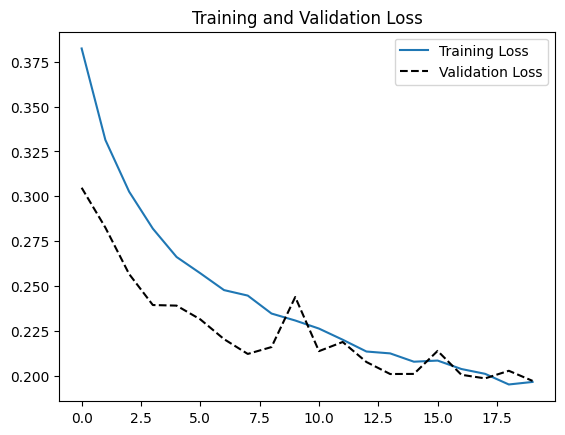

In [40]:
plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,'k--',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
# validation loss is decreasing and not increasing 
# also there is not much gap between training and validation accuracy.
# it shows that model is not overfitting 

## Predict Labels

In [51]:
predicted_classes = fashion_model.predict(test_X)

313/313 [==============================] - 4s 13ms/step


In [52]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [53]:
print(predicted_classes.shape)
print(test_Y.shape)

(10000,)
(10000,)


Found 91% correct labels


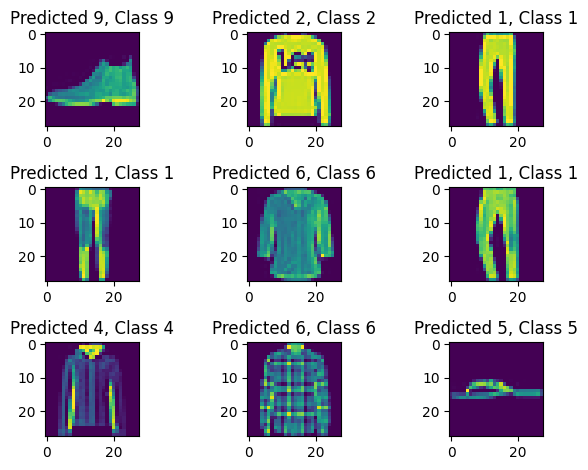

In [65]:
correct = np.where(predicted_classes == test_Y)[0]
print('Found %d%% correct labels'%(len(correct)*100/len(test_Y)))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28),
               interpolation='none')
    plt.title('Predicted {}, Class {}'.format(predicted_classes[correct],
                                              test_Y[correct]))

plt.tight_layout()
plt.show()

Found 8% incorrect labels


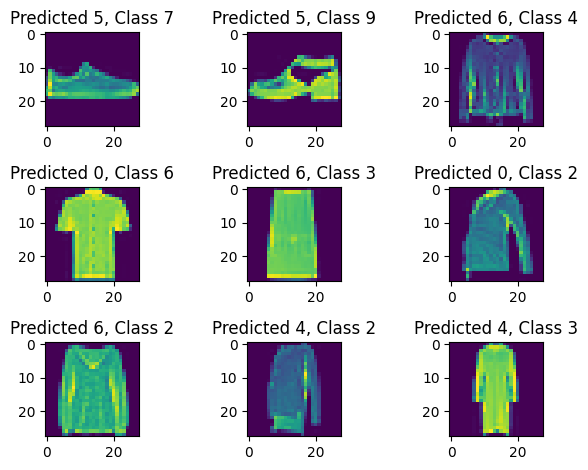

In [69]:
incorrect = np.where(predicted_classes != test_Y)[0]
print('Found %d%% incorrect labels'%(len(incorrect)*100/len(test_Y)))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28),
               interpolation='none')
    plt.title('Predicted {}, Class {}'.format(predicted_classes[incorrect],
                                              test_Y[incorrect]))
plt.tight_layout()
plt.show()

## Classification Report

In [70]:
from sklearn.metrics import classification_report

In [71]:
target_names = ['Class {}'.format(i) for i in range(num_classes)]

In [73]:
print(classification_report(test_Y,predicted_classes,
                            target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.80      0.88      0.84      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.90      0.85      0.87      1000
     Class 3       0.94      0.90      0.92      1000
     Class 4       0.85      0.89      0.87      1000
     Class 5       0.99      0.98      0.99      1000
     Class 6       0.79      0.75      0.77      1000
     Class 7       0.95      0.99      0.97      1000
     Class 8       0.99      0.98      0.99      1000
     Class 9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



## Make Prediction 

In [74]:
pred1 = fashion_model.predict(train_X[0].reshape(-1,28,28,1))[0]
pred2 = fashion_model.predict(train_X[1].reshape(-1,28,28,1))[0]

1/1 [==============================] - 0s 46ms/step


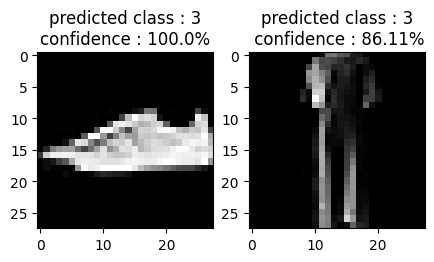

In [75]:
plt.figure(figsize=(5,5))
plt.subplot(121)
plt.imshow(train_X[0],cmap='gray')
plt.title(f'predicted class : {pred2.argmax(axis=0)}\nconfidence : {round(pred1.max()*100,2)}%')
plt.subplot(122)
plt.imshow(train_X[1],cmap='gray')
plt.title(f'predicted class : {pred2.argmax(axis=0)}\n confidence : {round(pred2.max()*100,2)}%')
plt.show()